# Pandas DataFrame for storing tweet feed (total 12 points)

Creating following date frame for storing tweets

- **climate_feed_df** DataFrame for storing tweet
- **retweeted_status_df** for storing original tweet

In [9]:
import pandas as pd
import numpy as np
import nltk
import re
import requests
from bs4 import BeautifulSoup as bsp
import ast



In [13]:
!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

In [ ]:
!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

<font color= "red">Click on these links if the above downloads fail. </font>


https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

Keep these pkl file in the same directory as notebook

In [14]:
retweeted_status_df = pd.read_pickle("./retweeted_status_df.pkl")

In [15]:
retweeted_status_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,scopes,source,text,truncated,user
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,None,Sat Feb 09 20:27:45 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,99.0,False,None,1.094332e+18,1094332044052549633,...,NaN,NaN,NaN,81.0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",The National Party declares war on the Glouces...,True,"{'default_profile': False, 'protected': False,..."
2,NaN,None,Sat Feb 09 23:56:18 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,6.0,False,None,1.094385e+18,1094384528267902977,...,"{'favorited': False, 'favorite_count': 2642, '...",1.093999e+18,1093998640392220673,5.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",This is the same idiot who thought\nThe southe...,False,"{'default_profile': False, 'protected': False,..."
3,NaN,None,Sat Feb 09 23:34:27 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,190.0,False,None,1.094379e+18,1094379028608438272,...,"{'favorited': False, 'favorite_count': 220, 'i...",1.093932e+18,1093931686998487040,31.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",Communism is Fascism. Fighting Climate Change ...,True,"{'default_profile': False, 'protected': False,..."
4,NaN,None,Sat Feb 09 19:07:56 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,2905.0,False,None,1.094312e+18,1094311957669265408,...,NaN,NaN,NaN,599.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Unmitigated climate change would literally des...,True,"{'default_profile': True, 'protected': False, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,NaN,None,Sat Feb 09 20:56:39 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,1.0,False,None,1.094339e+18,1094339317324017665,...,NaN,NaN,NaN,1.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",72% of Americans are 'very worried' about clim...,False,"{'default_profile': True, 'protected': False, ..."
9995,NaN,None,Thu Feb 07 20:27:55 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,3491.0,False,None,1.093607e+18,1093607309606076416,...,NaN,NaN,NaN,482.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@JFaurall @MgBenchjeweler @SpeakerPelosi Calif...,True,"{'default_profile': True, 'protected': False, ..."
9996,NaN,None,Sat Feb 09 18:33:00 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,12586.0,False,None,1.094303e+18,1094303164805799936,...,NaN,NaN,NaN,2801.0,False,NaN,"<a href=""https://about.twitter.com/products/tw...",President Trump believes we should listen to f...,True,"{'default_profile': False, 'protected': False,..."
9997,NaN,None,Fri Feb 08 22:15:50 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,4249.0,False,None,1.093997e+18,1093996855111966720,...,"{'favorited': False, 'favorite_count': 551, 'i...",1.093893e+18,1093893115633647616,642.0,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Wait til he hears how much climate change is g...,False,"{'default_profile': False, 'protected': False,..."


In [16]:
#climate_feed_df.to_pickle("./climate_feed.pkl")
climate_feed_df = pd.read_pickle("./climate_feed.pkl")
climate_feed_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user_id
0,None,None,Sun Feb 10 00:17:31 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389867499405313,1094389867499405313,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",.@SteveKingIA says he's unsure about the scien...,True,31476142
1,None,None,Sun Feb 10 00:17:30 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389862193455105,1094389862193455105,...,NaN,NaN,NaN,81,False,1.094332e+18,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",RT @RobOakeshott1: The National Party declares...,False,996782298
2,None,None,Sun Feb 10 00:17:26 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389844078485506,1094389844078485506,...,NaN,1093998640392220673,1093998640392220673,5,False,1.094385e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @emilia_suze: This is the same idiot who th...,False,45333453
3,None,None,Sun Feb 10 00:17:24 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389837522599936,1094389837522599936,...,NaN,1093931686998487040,1093931686998487040,31,False,1.094379e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @PrettyBadLefty: Communism is Fascism. Figh...,False,1020067726532829185
4,None,None,Sun Feb 10 00:17:23 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389831419994112,1094389831419994112,...,NaN,NaN,NaN,599,False,1.094312e+18,"<a href=""http://twitter.com/download/android"" ...",RT @kenklippenstein: Unmitigated climate chang...,False,19889325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,None,None,Sat Feb 09 20:57:54 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339630500012033,1094339630500012033,...,NaN,NaN,NaN,1,False,1.094339e+18,"<a href=""http://twitter.com/download/android"" ...",RT @fromhello2hello: 72% of Americans are 'ver...,False,888112320097918976
9995,None,None,Sat Feb 09 20:57:54 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339629107400704,1094339629107400704,...,NaN,NaN,NaN,482,False,1.093607e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @stuntdaddy_42: @JFaurall @MgBenchjeweler @...,False,3324836714
9996,None,None,Sat Feb 09 20:57:53 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339627316641794,1094339627316641794,...,NaN,NaN,NaN,2801,False,1.094303e+18,"<a href=""http://twitter.com/download/android"" ...",RT @SenSanders: President Trump believes we sh...,False,1487109794
9997,None,None,Sat Feb 09 20:57:51 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339619569557504,1094339619569557504,...,NaN,1093893115633647616,1093893115633647616,642,False,1.093997e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @KateAronoff: Wait til he hears how much cl...,False,4737089913


Here are dtypes for climate_feed_df. We'll work with only
- entities to extract hashtags
- retweeted_status in case we need to extract original full tweet
- truncated
- text: tweet text
- created_at
- user_id

Some of them have wrong datatypes.

In [17]:
climate_feed_df.dtypes

contributors                  object
coordinates                   object
created_at                    object
entities                      object
extended_entities             object
favorite_count                object
favorited                     object
geo                           object
id                            object
id_str                        object
in_reply_to_screen_name       object
in_reply_to_status_id         object
in_reply_to_status_id_str     object
in_reply_to_user_id           object
in_reply_to_user_id_str       object
is_quote_status               object
lang                          object
metadata                      object
place                         object
possibly_sensitive            object
quoted_status                 object
quoted_status_id              object
quoted_status_id_str          object
retweet_count                 object
retweeted                     object
retweeted_status             float64
source                        object
t

# Q1 (points .5) replace None with nan in climate_feed_df. Also display some random rows.


In [18]:
# write code here
climate_feed_df = climate_feed_df.fillna(value = np.nan)
climate_feed_df = climate_feed_df.replace('None' , np.nan)

climate_feed_df.sample(10)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user_id
9679,NaN,NaN,Sat Feb 09 21:03:52 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,0,False,NaN,1094341133268934657,1094341133268934657,...,"{'favorited': False, 'favorite_count': 1717, '...",1094132705988534272,1094132705988534272,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a good thread on addressing climate ch...,False,83827120
6014,NaN,NaN,Sat Feb 09 22:16:38 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094359443171667970,1094359443171667970,...,NaN,NaN,NaN,350,False,1.094335e+18,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @SiddonsDan: “Does God’s creation not inclu...,False,4925159489
3762,NaN,NaN,Sat Feb 09 23:04:02 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094371373760290821,1094371373760290821,...,NaN,NaN,NaN,189,False,1.094299e+18,"<a href=""http://twitter.com/download/android"" ...",RT @ArielAnaliza: Masacre de 56 millones de in...,False,466561167
5406,NaN,NaN,Sat Feb 09 22:27:57 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094362292588822528,1094362292588822528,...,NaN,NaN,NaN,2796,False,1.094303e+18,"<a href=""http://twitter.com/download/android"" ...",RT @SenSanders: President Trump believes we sh...,False,15037080
3642,NaN,NaN,Sat Feb 09 23:06:45 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094372055817048064,1094372055817048064,...,NaN,NaN,NaN,599,False,1.094312e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @kenklippenstein: Unmitigated climate chang...,False,915930451
9017,NaN,NaN,Sat Feb 09 21:15:59 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094344183505141761,1094344183505141761,...,NaN,NaN,NaN,5,False,1.094297e+18,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @HouseCracka: Nikki Haley on Pelosi’s Call ...,False,1142727199
5204,NaN,NaN,Sat Feb 09 22:32:09 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,0,False,NaN,1094363350794825728,1094363350794825728,...,NaN,NaN,NaN,1,False,NaN,"<a href=""http://twitter.com/download/android"" ...",No more racism no more cow farts no more airpl...,True,1905556350
435,NaN,NaN,Sun Feb 10 00:08:31 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094387602227048448,1094387602227048448,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@jkenney @lamphieryeg @ellisbross I gues Leona...,False,964728686250401792
7096,NaN,NaN,Sat Feb 09 21:53:45 +0000 2019,"{'hashtags': [{'indices': [125, 136], 'text': ...",NaN,0,False,NaN,1094353685956554752,1094353685956554752,...,NaN,NaN,NaN,4,False,1.094342e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @amywilentz: “We are like a drunk at the wh...,False,1242955585
7257,NaN,NaN,Sat Feb 09 21:50:52 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094352960056889344,1094352960056889344,...,NaN,NaN,NaN,28,False,1.094185e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @insideclimate: Investors are calling on fa...,False,363840581


Working with only selected attributes.

In [19]:
climate_feed_df = climate_feed_df[['created_at', 'entities','retweeted_status', 'truncated', 'user_id', 'text' ]].copy()

In [20]:
climate_feed_df.sample(10)

,created_at,entities,retweeted_status,truncated,user_id,text
4894,Sat Feb 09 22:38:49 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094354e+18,False,885754696887128064,"RT @vogueinq: Get a job, get a hobby, talk to ..."
1766,Sat Feb 09 23:43:34 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094276e+18,False,776998171,RT @alexanderbruz: Happy Saturday! Friendly re...
6473,Sat Feb 09 22:06:41 +0000 2019,"{'hashtags': [{'indices': [123, 136], 'text': ...",1.094318e+18,False,987417886187769856,RT @SierraClub: Climate champs in Congress inc...
8690,Sat Feb 09 21:22:25 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,True,1087923459462709248,How much longer before we learn once and for a...
8174,Sat Feb 09 21:32:38 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.093946e+18,False,770818737062621185,RT @ByRosenberg: God bless the climate reporte...
6603,Sat Feb 09 22:04:06 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,True,1042450453009584128,"@brianschatz “ deserves”—- from whom, by what ..."
6074,Sat Feb 09 22:15:16 +0000 2019,"{'hashtags': [{'indices': [87, 107], 'text': '...",1.094323e+18,False,763840408115748864,RT @SenWhitehouse: Worth a listen – @Financial...
3419,Sat Feb 09 23:11:43 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,True,704165059,@pavingstud27 @Dan88145100 @TerenceKelly9 @bri...
1893,Sat Feb 09 23:41:21 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.093607e+18,False,3463540821,RT @SenSanders: Climate change is an existenti...
8385,Sat Feb 09 21:28:19 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094303e+18,False,1056669512,RT @SenSanders: President Trump believes we sh...


# Q2 (points .5 =.25+.25) convert
- created_at to date time type
- truncated to bool type.


In [21]:
# write code here
climate_feed_df['created_at'] = pd.to_datetime(climate_feed_df['created_at'])
climate_feed_df['truncated'] = climate_feed_df['truncated'].astype('bool')


Checking datatype again

In [22]:
climate_feed_df.dtypes

created_at          datetime64[ns, UTC]
entities                         object
retweeted_status                float64
truncated                          bool
user_id                           int64
text                             object
dtype: object

# Q3(points .5) In climate_feed_df, calculate the number of NAN values in various columns

In [23]:
# write code here
print(climate_feed_df.isna().sum())
climate_feed_df.isna().sum().sum()


created_at             0
entities               0
retweeted_status    2690
truncated              0
user_id                0
text                   0
dtype: int64


2690

We'll use **ast** module to parse string to python dictionary

# Q4(points 1=.5+.5) Using *ast* module  convert entities to python dictionary. This dictionary should contain hashtags and user_mentions
 - Create a columns named hashtags. Values in this columns should be command separated values of **text** attribute in **hashtags**  value.
 - Create a columns named user_mentions.Values in this columns should be command separated values of **name** attribute in **user_mentions** values.

In [24]:
# write code here
#need to come back and refactor this into one function, repetative loop
def makeHashtag(entities):
    #print(entity)
    for entity in entities:
        #print(entity)
        preDict = ast.literal_eval(entity)
        #print('one success')
        #print(preDict)
        #print(preDict.get('hashtags'))
        
        try:
            yield preDict.get('hashtags' , [])[0].get('text' , np.nan)
        except:
            yield preDict.get('hashtags' , np.nan)
        
def makeUser_mentions(entities):
    for entity in entities:
        preDict = ast.literal_eval(entity)
        #print(preDict.get('user_mentions'))
        
        try:
            yield preDict.get('user_mentions' , [])[0].get('name', np.nan)
        except:
            yield preDict.get('user_mentions' , [])
    

climate_feed_df['hashtags'] = pd.Series(makeHashtag(climate_feed_df['entities']))
#climate_feed_df['hashtags'].sample(30)

climate_feed_df['user_mentions'] = pd.Series(makeUser_mentions(climate_feed_df['entities']))
#climate_feed_df['user_mentions'].sample(20)


# Cleaning tweets

Let's see some random tweets

In [14]:
tweet_length= 280
pd.set_option('max_colwidth', 2*tweet_length)
climate_feed_df['text'].sample(100)

8151    Who are the"elites"? The 2% we're told aren't paying their fair share? That fly on private jets &amp; scream about clim… https://t.co/nJtsGfgHTi
7449      RT @TheLoveBel0w: "Welp. 250 000 people per year better start praying for a deficit-neutral solution" - Conservatives\n\nhttps://t.co/P3QvjsV…
7360        @nickchk Global climate change.\nWe get new information every year saying that we are accelerating towards disaster… https://t.co/anjbVrWqm2
8864        RT @philipaklein: The threat of climate change is so urgent that we can't solve it unless we commit to giving everybody free healthcare, fr…
8782      RT @SenSanders: President Trump believes we should listen to fossil fuel executives and ignore climate change. \n\nI believe we should listen…
                                                                              ...                                                                       
9042        RT @SiddonsDan: “Does God’s creation not include protecting babies as 

**Example of tweet not truncated**

In [25]:
climate_feed_df['text'].loc[3929]

'Fighting climate change without nuclear is a fool’s errand. https://t.co/KPSCk6fjsa'

**Exampe of tweet truncated**

In [26]:
climate_feed_df['text'].loc[3928]

'RT @_Oliver_Yates: If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fighting f…'

Truncated tweet has three horizontal ellipses in it. One can check retweeted_status values and 
use it got the the original tweet text

In [17]:
climate_feed_df.retweeted_status.loc[3928]

1.0943594112863928e+18

In [18]:
retweeted_status_df[retweeted_status_df.id == climate_feed_df.retweeted_status.loc[3928]].text.iloc[0]

'If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fight… https://t.co/OJlsDeFoNA'

There is url above tweet. We can use **requests** to get the complete text.



# Q5(points 3.5= 1(use of requests and text extraction from right html element)+.5+1+1 ) Perform following activities for creating a new original_tweet_text field in climate_feed_df. 

- If  climate_feed_df has a valid retweeted_status(**it is an id of the record in retweeted_status_df** ), then use retweeted_status_df to get the original text(**retweeted_status_df.text**) otherwise use None(**Ignore the value of climate_feed_df.truncated field for this activity.**).
    + If retweeted_status_df.text has a URL(like https://t.co/RKyppIS5c9 ), use it to get complete text from right html element. 
    
    *If you have a way to figure out that one is not supposed to web scrap this URL don't scrap it.*
    
- Create a new field named **original_tweet_text** in climate_feed_df to store the text extracted from URL(use None if requests to URL fails or any other issues.). Use retweeted_status_df.text if there was no 
 URL.
- From  newly original_tweet_text field remove
    - one or more \n with .(dot)
    - any url(http, https)
    - @user, @user:

*Note that as you will be making a lot of requests call(I/O bound calls), this portion of code can be slow. you may want to test your code on a small number of records first.*

In [10]:
# Write code here
#Prof. Parada has instructed us to use this as this question has changed since its inception.
climate_feed_df = pd.read_pickle("./q5_dataframe.pkl")
#climate_feed_df.sample(10)


# Q 6(point 1= .5+.5) Remove all the reference  of RT and  @user: or @user, and url in climate_feed_df text attribute.

In [11]:
# write code here
climate_feed_df['text'] = [re.sub('^RT' , '' , str(x)) for x in climate_feed_df['text']]
climate_feed_df['text'] = [re.sub('(?<=\@)(\S*)' , '' , str(x)) for x in climate_feed_df['text']]
climate_feed_df['text'] = [re.sub('@' , '' , str(x)) for x in climate_feed_df['text']]
climate_feed_df['text'] = [re.sub('https://.*' , '' , str(x)) for x in climate_feed_df['text']]
#climate_feed_df.head(10)


# Q 7 (2 point) Create a new attribute in climate_feed_df named *final_tweet_text*. If *original_tweet_text* is None  then use climate_feed_df.text otherwise use *original_text_tweet* if initial words matched with *climate_feed_df.text* words. If words doesn't match use climate_feed_df.text

Note that some time after fetching text from a url based on retweeted_status_df.text, we may get different text. We can fix it but for this homework we are ignoring it.

In [12]:
# wite code here
#climate_feed_df.head(10)
def createFinalTweetText(row):
    if row['original_tweet_text'] is None:
        return row['text']
    elif row['original_tweet_text'] == row['text']:
        return row['original_tweet_text']
    else:
        return row['text']
    


climate_feed_df['final_tweet_text'] = climate_feed_df.apply(lambda row: createFinalTweetText(row), axis=1)
climate_feed_df.sample(10)

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str,final_tweet_text
4115,2019-02-09 22:57:31,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094309e+18,True,247935199,"The truth is strong with this one:\n\n""Our p...",None,XR_NYC,"The truth is strong with this one:\n\n""Our pla...",1094309204561674241,"The truth is strong with this one:\n\n""Our p..."
481,2019-02-10 00:07:41,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.093897e+18,True,1335772598,"Anti- abortion, anti-women, anti-science, an...",None,Stephen Carter,"Anti- abortion, anti-women, anti-science, anti...",1093896906617602048,"Anti- abortion, anti-women, anti-science, an..."
8050,2019-02-09 21:35:06,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.093683e+18,True,18804231,The threat of climate change is so urgent th...,None,Philip Klein,The threat of climate change is so urgent that...,1093682904633360384,The threat of climate change is so urgent th...
3566,2019-02-09 23:08:34,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,True,970113980780896256,"Because re-electing a climate change denying, ...",None,None,None,None,"Because re-electing a climate change denying, ..."
7720,2019-02-09 21:42:22,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094337e+18,True,3439166177,A Huge Climate Change Movement Led By Teenag...,None,Sonny Scroggins,A Huge Climate Change Movement Led By Teenage ...,1094337098679750657,A Huge Climate Change Movement Led By Teenag...
595,2019-02-10 00:05:08,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094378e+18,True,224633867,When it comes to paying for the cost of cli...,None,"Eugene Gu, MD,Donald J. Trump",@realDonaldTrump When it comes to paying for t...,1094378058998415360,When it comes to paying for the cost of cli...
4486,2019-02-09 22:48:32,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094099e+18,True,859029968,Climate change is a race we can win. \n\n wi...,None,"United Nations,António Guterres",Climate change is a race we can win. \n\n@anto...,1094099070300364802,Climate change is a race we can win. \n\n wi...
5669,2019-02-09 22:23:25,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,True,1969389331,"Kendall would’ve been sacked in 1983, Moyes w...",None,Smithy,None,None,"Kendall would’ve been sacked in 1983, Moyes w..."
2749,2019-02-09 23:25:43,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,True,3291067631,And even Pentagon from all people,None,"Neeterz Ireland,Tru Justice,Bernie Sanders",None,None,And even Pentagon from all people
4631,2019-02-09 22:45:13,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,True,96542737,"Economists: "" We should go back asking big que...",None,None,None,None,"Economists: "" We should go back asking big que..."


# Emoji detection

See this example of emoji as unicode characters

In [55]:
climate_feed_df['final_tweet_text'].loc[3931]

' Oh my god, CARBON.......😱😱😱 Cue the outrage machine against smartphone. These things are adding to climate change.'

We can use use regex to capture this emji

https://apps.timwhitlock.info/emoji/tables/unicode


In [31]:
emoji_regex = re.compile(r"\U0001F631", re.UNICODE)

In [32]:
emoji_regex.findall(climate_feed_df['final_tweet_text'].loc[3931])

['😱', '😱', '😱']

We'll use emoji library to make this task easier.

Here is some documentation about unicode support in python

https://docs.python.org/3/howto/unicode.html

In [33]:
#! pip install emoji

In [14]:
import emoji

In [35]:
emoji.UNICODE_EMOJI

{'en': {'🥇': ':1st_place_medal:',
  '🥈': ':2nd_place_medal:',
  '🥉': ':3rd_place_medal:',
  '🆎': ':AB_button_(blood_type):',
  '🏧': ':ATM_sign:',
  '🅰': ':A_button_(blood_type):',
  '🇦🇫': ':Afghanistan:',
  '🇦🇱': ':Albania:',
  '🇩🇿': ':Algeria:',
  '🇦🇸': ':American_Samoa:',
  '🇦🇩': ':Andorra:',
  '🇦🇴': ':Angola:',
  '🇦🇮': ':Anguilla:',
  '🇦🇶': ':Antarctica:',
  '🇦🇬': ':Antigua_&_Barbuda:',
  '♒': ':Aquarius:',
  '🇦🇷': ':Argentina:',
  '♈': ':Aries:',
  '🇦🇲': ':Armenia:',
  '🇦🇼': ':Aruba:',
  '🇦🇨': ':Ascension_Island:',
  '🇦🇺': ':Australia:',
  '🇦🇹': ':Austria:',
  '🇦🇿': ':Azerbaijan:',
  '🔙': ':BACK_arrow:',
  '🅱': ':B_button_(blood_type):',
  '🇧🇸': ':Bahamas:',
  '🇧🇭': ':Bahrain:',
  '🇧🇩': ':Bangladesh:',
  '🇧🇧': ':Barbados:',
  '🇧🇾': ':Belarus:',
  '🇧🇪': ':Belgium:',
  '🇧🇿': ':Belize:',
  '🇧🇯': ':Benin:',
  '🇧🇲': ':Bermuda:',
  '🇧🇹': ':Bhutan:',
  '🇧🇴': ':Bolivia:',
  '🇧🇦': ':Bosnia_&_Herzegovina:',
  '🇧🇼': ':Botswana:',
  '🇧🇻': ':Bouvet_Island:',
  '🇧🇷': ':Brazil:',
  '🇮🇴': ':Britis

# Q 8(1 point) Create a column  called *emoji*.  This coumns should contains a list of tuples for emoji detected in *final_tweet_text*. First element of tuple is the emoji detected and second is the text describing the emoji.

In [15]:
# write code here


def getEmoji(row):
    eng = emoji.UNICODE_EMOJI.get('en')
    emoj = re.compile(r'[\u263a-\U0001f645]', re.UNICODE)
    
    emojContain = emoj.findall(row['final_tweet_text'])
    returnList = []
#     if emojContain != []:
#         print(emojContain)
        
#     for e in emojContain:
#         print(e)
#         print(eng.get(e))
#         returnList.append(e)
    
    returnList = [(x , eng.get(x)) for x in emojContain]
    
    #print(returnList)
    
    return returnList
    
climate_feed_df['emoji'] = climate_feed_df.apply(lambda row: getEmoji(row), axis=1)
climate_feed_df['emoji'].loc[3931]

[('😱', ':face_screaming_in_fear:'),
 ('😱', ':face_screaming_in_fear:'),
 ('😱', ':face_screaming_in_fear:')]

# We'll use wordcloud  to do elemetary exploratory data analysis(EDA). We'll do some cleanup before using wordcloud.

https://github.com/amueller/word_cloud

In [ ]:
!pip install wordcloud

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

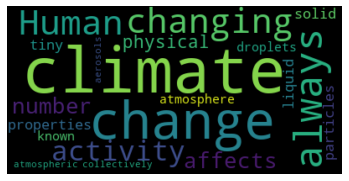

In [18]:
# here is a sample
text = "climate change. Climate is always changing. Human activity also affects climate through changes in the number and physical properties of tiny solid particles and liquid droplets in the atmosphere, known collectively as atmospheric aerosols"
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

As you can see word size is proportional to frequency of a word and highlight the main keywords in a text.
This gives an idea about the content of the  text.

We can do all the text pre processing or wrangling
 like 

- More Cleaning
- Case conversion
- Spell correction
- Expanding contractions
- Removing stop words
- Morphological normalization
    - Stemming
    - Lemmatization


But for this homework we'll only **do expanding contractions,  stop words removal,  and lemmatization**

# Q 9 (2 = .5+.5+.5+.5 points) Do
- expanding contractions
- stop words removal
- lemmatization
- Use wordcloud to visualize keywords

In [71]:
# write code here
import nltk
#May need to uncomment htis if not downloaded
#nltk.download('all')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

def wordCloundGen(row):
    #token = nltk.RegexpTokenizer(pattern=f'\w+', gaps=False)
    #words = token.tokenize(row['text'])
    token = nltk.WordPunctTokenizer()
    words = token.tokenize(row['text'])
    
    #removing stop words here
    words = [i for i in words if i not in nltk.corpus.stopwords.words('english')]
    
    #lemmatizing nouns here
    wnetl = WordNetLemmatizer()
    words = [wnetl.lemmatize(i , 'n') for i in words]
    
    #expanding contractions here, sloppy but should work
    for word in words:
        word = re.sub(r'can\'t', 'cannot', word)
        word = re.sub(r'haven\'t'  , 'have not', word)
        word = re.sub(r'(\w+)\'ll', '\g<1> will', word)
        word = re.sub(r'(\w+)\'re' , '\g<1> are', word)

        
    #print(words)
    return words
    
    
climate_feed_df['words'] = climate_feed_df.apply(lambda row: wordCloundGen(row), axis=1)

text = climate_feed_df['words']
climate_feed_df['words'].sample(3)

3181    [BREAKING, :, Huge, !!, Court, rule, new, Oz, ...
357     [Retired, lawyer, facing, jail, sentence, TMX,...
3522    [The, phrase, ", denier, ", ', strong, enough,...
Name: words, dtype: object

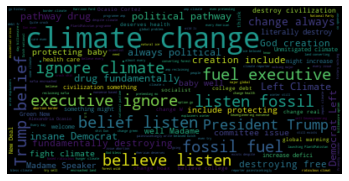

In [69]:
wc = ""
for i in text:
    wc = test + (' ').join(i)
    
wordcloud = WordCloud().generate(str(wc))
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

# Homework ends
# Final thoughts
He haven't done all the cleanup or used all the attributes for EDA.I just want to highlight one more clean up activity related to language.

In [72]:
import enchant

In [73]:
dictionary = enchant.Dict('en')

In [70]:
climate_feed_df['text'].loc[5217]

'去LACMA那么多次，都没意识到旁边的Tar Pits是啥…\n一直以为是摆几个造型给小朋友们玩的公园…\n站在千年前的point看千年后的楼宇车辆，再一想climate change，千年后人类可能也不存在了就觉得——有点兴奋'

In [74]:
[dictionary.check(w) for w in  nltk.word_tokenize(climate_feed_df['text'].loc[5217])]

[False, False, False, False, False]